# Linear regression

Initial weights: [0, -1]
Initial cost: 540.5360663843456
Updated weights: [0.30956308633447543, -0.8885572290119184]
Cost: 529.7674280477665
Updated weights: [0.615948021511844, -0.7783795579400702]
Cost: 519.2214204828034
Updated weights: [0.9191875238152215, -0.6694528741609032]
Cost: 508.89343596270936
Updated weights: [1.2193139738948846, -0.5617632204567682]
Cost: 498.77896221514925
Updated weights: [1.5163594182596731, -0.45529679332139117]
Cost: 488.87358044316636
Updated weights: [1.8103555727322231, -0.3500399412836802]
Cost: 479.17296338720786
Updated weights: [2.1013338258684073, -0.24597916324967234]
Cost: 469.6728734273567
Updated weights: [2.3893252423413527, -0.1431011068624239]
Cost: 460.36916072493494
Updated weights: [2.6743605662904026, -0.04139256687965172]
Cost: 451.2577614026626
Updated weights: [2.9564702246353907, 0.059159516431065665]
Cost: 442.33469576257005
Updated weights: [3.2356843303565808, 0.15856805887971603]
Cost: 433.5960665408807
Updated weights: [3.

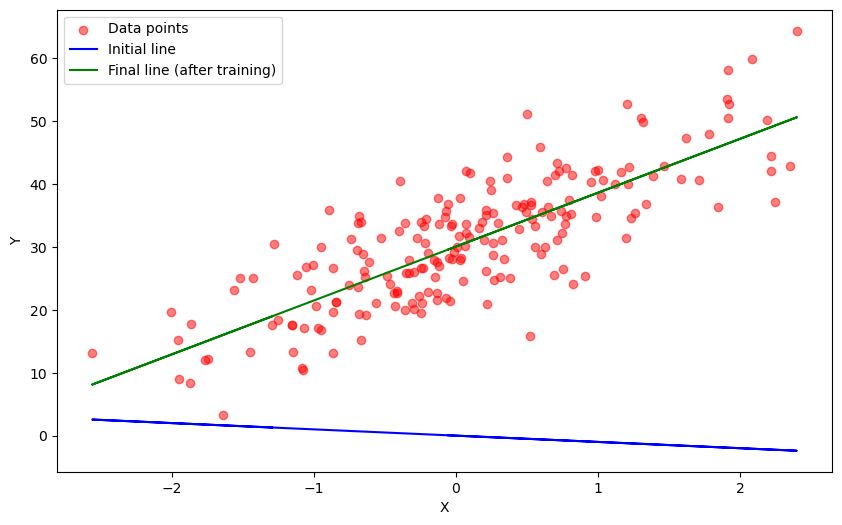

In [34]:
import numpy as np
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

# Generate regression data
X, y = make_regression(n_samples=200, n_features=1, n_informative=1, noise=6, bias=30, random_state=200)

m = 200  # Number of samples

# Linear Model
def h(X, w):
    return (w[1] * X[:, 0] + w[0])  # Model: h(X) = w0 + w1 * X

# Cost Function
def cost(w, X, y):
    return (0.5/m) * np.sum(np.square(h(X, w) - y))

# Gradient of the Cost Function
def grad(w, X, y):
    g = [0]*2
    g[0] = (1/m) * np.sum(h(X, w) - y)  # Gradient for w0
    g[1] = (1/m) * np.sum((h(X, w) - y) * X[:, 0])  # Gradient for w1
    return g

# Gradient Descent
def descent(w_new, w_prev, lr):
    print("Initial weights:", w_prev)
    print("Initial cost:", cost(w_prev, X, y))

    j = 0
    while True:
        # Compute the gradient
        gradient = grad(w_prev, X, y)
        
        # Update the weights w0 and w1
        w0 = w_prev[0] - lr * gradient[0]  # Update w0
        w1 = w_prev[1] - lr * gradient[1]  # Update w1
        
        # Store the new weights
        w_new = [w0, w1]
        
        print("Updated weights:", w_new)
        print("Cost:", cost(w_new, X, y))

        # Check for convergence (ensure we're comparing scalars)
        if (w_new[0] - w_prev[0])**2 + (w_new[1] - w_prev[1])**2 <= pow(10, -6):
            return w_new
        
        # Check the number of iterations
        if j > 500:  # Max iterations to avoid infinite loops
            return w_new
        
        j += 1
        w_prev = w_new  # Update w_prev for the next iteration

# Initialization of parameters
w = [0, -1]  # Initial weights

# Training the Model
final_w = descent(w, w, 0.01)  # Start gradient descent
print("Final parameters:", final_w)

# Visualization: Initial and Final Best-fit Lines
plt.figure(figsize=(10, 6))

# Plot the data points
plt.scatter(X, y, c='red', alpha=0.5, marker='o', label='Data points')

# Plot the initial line (before training)
y_initial = h(X, [0, -1])  # Using initial weights [0, -1]
plt.plot(X, y_initial, color='blue', label='Initial line')

# Plot the final line (after gradient descent)
y_final = h(X, final_w)  # Using final weights after training
plt.plot(X, y_final, color='green', label='Final line (after training)')

# Add labels and legend
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()

# Show plot
plt.show()
